# Color to Grayscale

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(img):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    return (0.2989 * r 
           +0.5870 * g
           +0.1140 * b)

In [3]:
img = plt.imread('D:\\Dataset\\4.2.03.tiff')
print(img.shape)
print(rgb2gray(img).shape)

(512, 512, 3)
(512, 512)


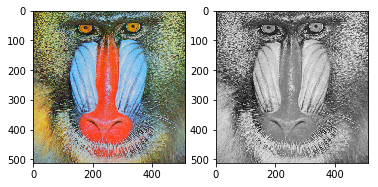

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(rgb2gray(img), cmap='gray')

plt.show()

# Color Transformation Example

In [ ]:
def do_normalise(img):
    return -np.log(1/((1 + img)/257) - 1)

def undo_normalise(img):
    return ( 1 + 1/(np.exp(-img) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
# 3D rotation matrix for rotation around X axis by angle theta
    return np.c_[[1, 0, 0],
                [0, np.cos(theta), -np.sin(theta)],
                [0, np.sin(theta), np.cos(theta)]]

In [ ]:
img = plt.imread('/home/pi/Dataset/4.2.03.tiff')
plt.imshow(img)
plt.show()

In [ ]:
img1 = do_normalise(img)
plt.imshow(img1)
plt.show()

In [ ]:
img2 = np.einsum("ijk,lk->ijl", img1, rotation_matrix(np.pi))
plt.imshow(img2)
plt.show()

In [ ]:
img3 = undo_normalise(img2)
plt.imshow(img3)
plt.show()

# Animation with Color Transform

In [ ]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(5, 8))

In [ ]:
def update(i):
    img1 = do_normalise(img)
    img2 = np.einsum("ijk,lk->ijl", img1, rotation_matrix(i * np.pi/10))
    img3 = undo_normalise(img2)
    
    ax.imshow(img3)
    ax.set_title("Angle: {0}*pi/10".format(i), fontsize = 45)
    ax.set_axis_off()

In [ ]:
anim = FuncAnimation(fig, update, frames=np.arange(0, 40), interval=100)
anim.save('animated_image.gif', dpi=80, writer='pillow')
plt.close()

# Image Thresholding

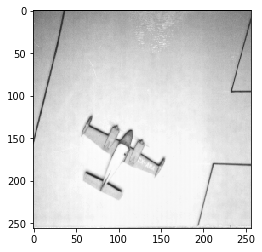

In [6]:
img = plt.imread('D:\\Dataset\\5.1.11.tiff')

plt.imshow(img, cmap='gray')
plt.show()

In [5]:
def threshold(img, thresh=127):
    return((img > thresh) * 255).astype("uint8")

def inverted_threshold(img, thresh=127):
    return((img < thresh) * 255).astype("uint8")

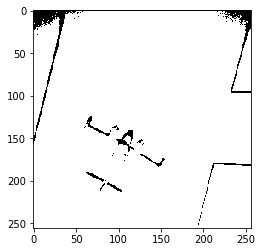

In [7]:
plt.imshow(threshold(img), cmap='gray')
plt.show()

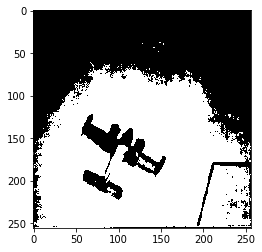

In [8]:
plt.imshow(threshold(img, 200), cmap='gray')
plt.show()

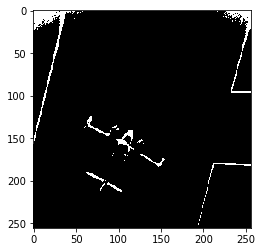

In [9]:
plt.imshow(inverted_threshold(img), cmap='gray')
plt.show()

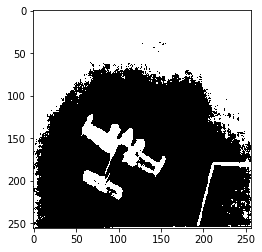

In [10]:
plt.imshow(inverted_threshold(img, 200), cmap='gray')
plt.show()

# Tinting a color image

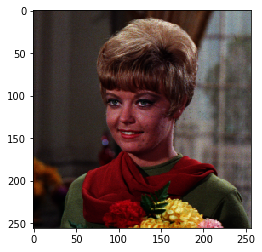

In [12]:
img = plt.imread('D:\\Dataset\\4.1.01.tiff')
plt.imshow(img)
plt.show()

In [13]:
def tint(img, percent=0.5):
    return (img + (np.ones(img.shape) - img) * percent).astype("uint8")

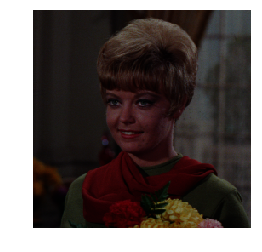

In [14]:
plt.axis('off')
plt.imshow(tint(img))
plt.show()

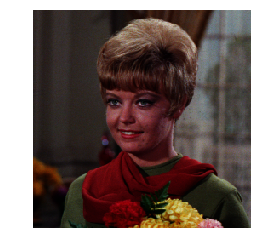

In [15]:
plt.axis('off')
plt.imshow(tint(img, 0.1))
plt.show()

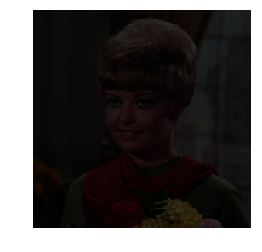

In [16]:
plt.axis('off')
plt.imshow(tint(img, 0.8))
plt.show()

# Shade

In [17]:
def shade(img, percent=0.5):
    return (img * (1 - percent)).astype("uint8")

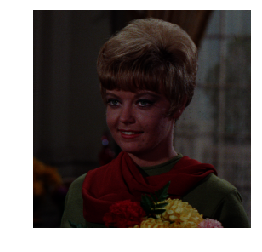

In [18]:
plt.axis('off')
plt.imshow(shade(img))
plt.show()

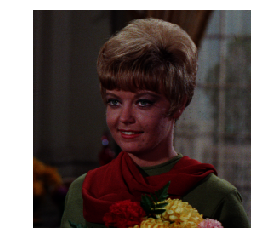

In [19]:
plt.axis('off')
plt.imshow(shade(img, 0.3))
plt.show()

# Gradient

In [20]:
def gradient(img, reverse=False):
    cols = img.shape[1]
    if reverse:
        C = np.linspace(1, 0, cols)
    else:
        C = np.linspace(0, 1, cols)
    C = np.dstack((C, C, C))
    print(C.shape)
    return (C * img).astype("uint8")

(1, 256, 3)


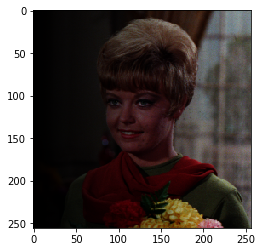

In [21]:
plt.imshow(gradient(img))
plt.show()

(1, 256, 3)


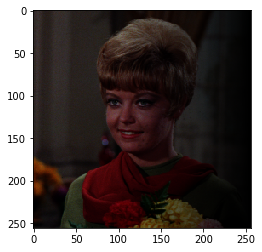

In [22]:
plt.imshow(gradient(img, True))
plt.show()

# Max RGB Filter

In [25]:
def max_rgb(img):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    M = np.maximum(np.maximum(r, g), b)
    
    img.setflags(write=1)
    
    r[r < M] = 0
    g[g < M] = 0
    b[b < M] = 0
    
    return(np.dstack((r, g, b)))

In [26]:
print(max_rgb(img))

[[[ 52   0   0]
  [ 47   0   0]
  [ 50   0   0]
  ...
  [137   0   0]
  [  0 137   0]
  [  0 134   0]]

 [[ 55   0   0]
  [ 50   0   0]
  [ 54   0   0]
  ...
  [  0   0 143]
  [  0   0 139]
  [  0   0 146]]

 [[ 46   0   0]
  [ 49   0   0]
  [  0   0  55]
  ...
  [  0 137   0]
  [  0 131   0]
  [  0 134   0]]

 ...

 [[  0   5   5]
  [  0   0   4]
  [  3   3   3]
  ...
  [  0  64   0]
  [  0  93   0]
  [  0 105   0]]

 [[ 11   0   0]
  [ 12   0  12]
  [ 12   0   0]
  ...
  [  0  68   0]
  [  0  88   0]
  [  0 105   0]]

 [[ 20   0   0]
  [ 19   0   0]
  [ 20   0   0]
  ...
  [  0  56   0]
  [  0  78   0]
  [  0 100   0]]]


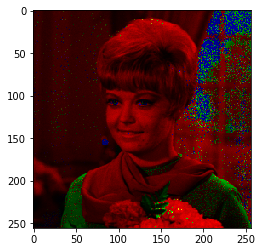

In [27]:
plt.imshow(max_rgb(img))
plt.show()

# Intensity Normalization

In [31]:
def normalize(img):
    lmin = float(img.min())
    lmax = float(img.max())
    return np.floor((img-lmin)/(lmax-lmin)*255.0)

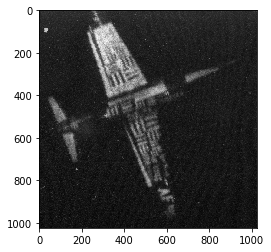

In [33]:
img = plt.imread('D:\\Dataset\\7.2.01.tiff')
plt.imshow(img, cmap='gray')
plt.show()

In [34]:
print(img - normalize(img))

[[-29. -12. -13. ... -13. -12. -10.]
 [-14.  -7.  -7. ... -10.  -7.  -6.]
 [ -7.  -7.  -5. ...  -7.  -7.  -9.]
 ...
 [  1.   0.  -1. ...   1.   1.  -3.]
 [ -2.   0.   2. ...   1.   1.   2.]
 [  1.   2.  -2. ...   0.  -1.   0.]]


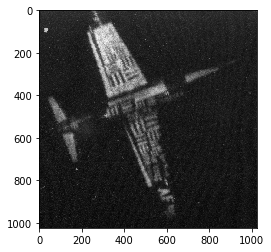

In [35]:
plt.imshow(normalize(img), cmap='gray')
plt.show()